Name: Wenhao Wu

Student ID: 1304952

In [352]:
import numpy as np

data = np.load("grading.npz")
x = data['x']
y = data['y']

print(x.shape)
print(y.shape)

for i in range(0, x.shape[1]):
    meanScore = np.mean(x[:,i])
    minScore = np.min(x[:,i])
    maxScore = np.max(x[:,i])
    print("score ",i," mean", meanScore)
    print("score ",i," min", minScore)
    print("score ",i," max", maxScore)

meanGrade = np.mean(y)
print("grade mean ",meanGrade)

(4000, 3)
(4000,)
score  0  mean 74.01725
score  0  min 7.0
score  0  max 100.0
score  1  mean 55.40175
score  1  min 0.0
score  1  max 100.0
score  2  mean 61.82125
score  2  min 25.0
score  2  max 98.0
grade mean  3.03275


Observations as below:
1. 4000 students in total
2. Grades are from 0 to 5, Each element of score is 0 to 100
3. Linear equation with three variables, formula could be $ax[0] + bx[1] + cx[2] + d = y$, where x is the array of score and y is the grade of a certain student

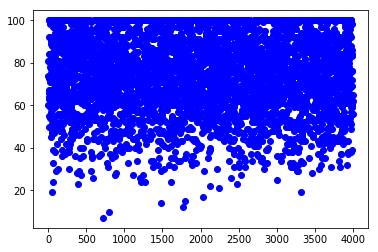

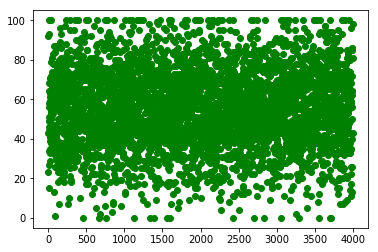

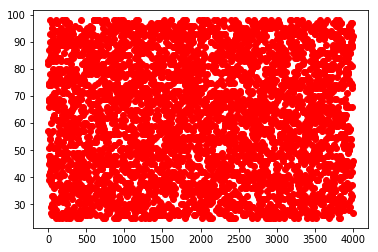

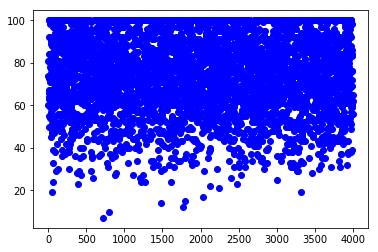

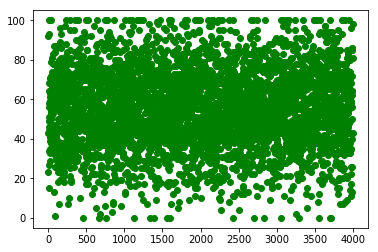

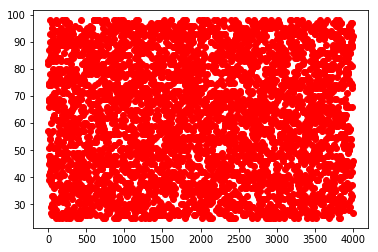

In [353]:
# This cell is to normalize the input, in our case, the scores
import matplotlib.pyplot as plt

axes = plt.gca()
plt.plot(x[:,0],'bo')
plt.show()

plt.plot(x[:, 1], 'go')
plt.show()

plt.plot(x[:,2], 'ro')
plt.show()

mean = np.mean(x, axis=0)
std = np.std(x, axis=0)

x -= mean
x /= (2*std)

axes = plt.gca()
plt.plot(x[:,0],'bo')
plt.show()

plt.plot(x[:,1], 'go')
plt.show()

plt.plot(x[:,2], 'ro')
plt.show()


Observations:
1. Score 0 is 

In [354]:
import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(3,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [358]:
hist = model.fit(x, y, epochs=1, batch_size=4)

p = model.predict(x)
p = p.reshape(1,4000)[0]
p = np.round(p[:])

print("\nAccurancy: ",np.sum(p == y) / len(y))

Epoch 1/1
4000/4000 [==============================] - 1s 270us/step - loss: nan - mean_squared_error: nan

Accurancy:  0.0
